In [8]:
import pandas as pd
from jqdatasdk import *
import datetime
import numpy as np
auth('13085060726','Thinkpad@x250')



day=input('请输入前n天,不超过39')
def tech():
    code1=get_industry_stocks('HY523')
    code2=get_industry_stocks('HY524')
    code=['002049.XSHE','603986.XSHG','002475.XSHE','300206.XSHE','603160.XSHG','000100.XSHE','300782.XSHE','002156.XSHE','002387.XSHE','300433.XSHE','300750.XSHE','000725.XSHE','002456.XSHE','002594.XSHE','002371.XSHE','600703.XSHG']
    code=list(set(code))
    return code
#指定比较标的（科技股）
def customize():
    stock_code=input('请输入股票代码')
    return stock_code

def suspension_filter(stock):
    for i in stock:
        shoupan=get_price(i,count=day,end_date=datetime.date.today(),fields='paused', skip_paused=False)
        shoupanbiao=shoupan['paused'].tolist()
        if sum(shoupanbiao)!=0:
            stock.remove(i)
    return stock
#筛除停牌

def spjsim(code,day):
    spj=[]
    spj2=[]
    for j in range(int(day)):
        for i in code:
            #spj=attribute_history(i,int(day),unit='1d',fields=['close'],skip_paused=True,df='False')
            spj=get_price(i, end_date=datetime.date.today(), frequency='daily', fields=['close'], skip_paused=True, fq='pre', count=int(day), panel=False, fill_paused=True)
            #获得某只个股收盘价
            ini=spj['close'].tolist()
            #把其转换为列表
            spj2.append(ini)
    spj2=spj2[0:len(code)]
    #取前n个数值，避免后面重复
    spj2=np.transpose(spj2).tolist()
    #转置矩阵为横向股票，纵向股价
    weighted_price=[]
    for i in spj2:
        #df = get_valuation(code,count=2,fields='circulating_market_cap',end_date=datetime.date.today())
        df = get_fundamentals(query(valuation).filter(valuation.code.in_(code)), date=None)
        market_value=df['circulating_market_cap'].tolist()
        market_value=market_value[0:len(code)]
        elements=i
        #print(len(elements))
        #print(len(market_value))
        ele=float(np.average(elements, weights=market_value))
        weighted_price.append(ele)
    #把加权平均价格转成列表
    return weighted_price
#收盘价列表

indu=get_industries('jq_l2', date=datetime.date.today())
industries=list(indu.index)
benchmark=spjsim(suspension_filter(tech()),day)
s1=pd.Series(benchmark)
#取科技行业为基准
dict={}
for i in industries:
    stks=get_industry_stocks(i,date=datetime.date.today())
    compared=spjsim(stks,day)
#print(compared)
    s2=pd.Series(compared)#转为series类型
    dict[i]=s1.corr(s2,method="pearson")
    dict2 = sorted(dict.items(), key=lambda dict: dict[1], reverse=True)

for key in list(dict.keys()):
        if not dict.get(key):
            del dict[key]       
dict2 = sorted(dict.items(), key=lambda dict: dict[1], reverse=True)
       
for key in list(dict.keys()):
        if not dict.get(key):
            del dict[key]       
df=pd.DataFrame(dict,index=[0])
df=df.dropna(axis = 1).transpose()

df = df.sort_values(by=0,ascending=False)

ax=df.plot(kind='bar',figsize=(50,10),rot=0)
fig = ax.get_figure()
fig.savefig('fig.png')

请输入前n天,不超过3920


KeyboardInterrupt: 

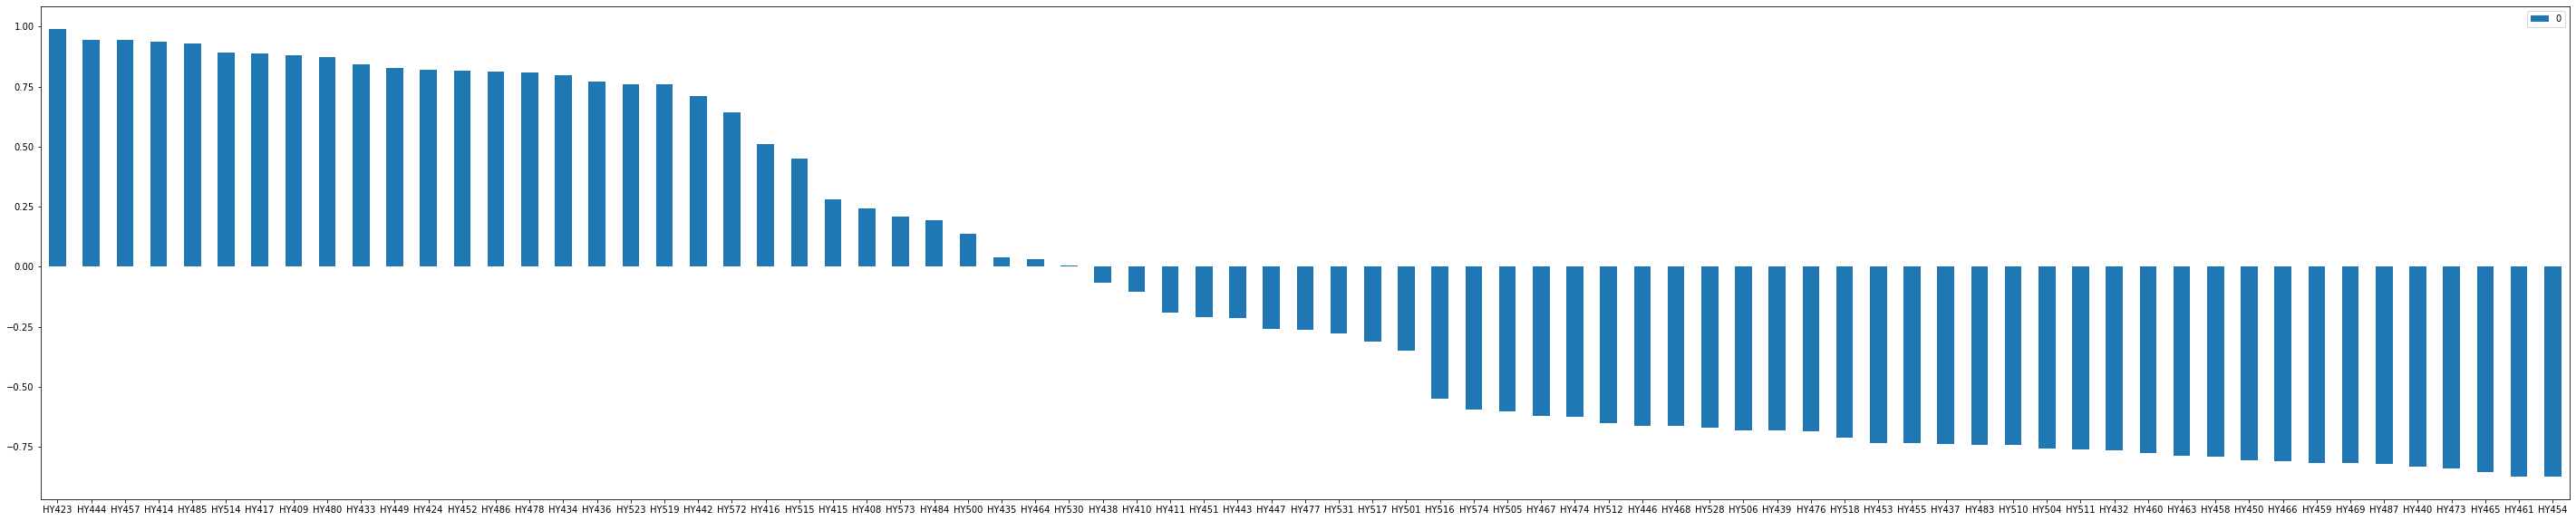